In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_analisis= pd.read_csv("df_final.csv", index_col=0)
df_analisis.sample(4)

,employee_id,age,attrition,businesstravel,$_dailyrate,department,distancefromhome,education,educationfield,environmentsatisfaction,gender,$_hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,$_monthlyincome,$_monthlyrate,numcompaniesworked,overtime,%_percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,datebirth,$_salary,remotework
452,453,30,No,travel_frequently,512.57,NaN,2,4,NaN,4,female,64.069968,2,1,research scientist,1,NaN,4140.00,10764.00,0,no,16,3.00000,4,part time,0,10.000000,2,2.753334,9,NaN,0,7,1993,49680.000000,no
253,254,31,No,non_travel,433.02,NaN,36,3,life sciences,2,male,73.421004,3,2,laboratory technician,3,divorced,3497.50,9093.50,1,no,11,3.00000,1,part time,1,10.000000,2,3.000000,10,NaN,0,2,1992,56930.553130,no
1406,1407,42,No,non_travel,499.47,NaN,2,3,medical,3,male,62.432017,2,1,laboratory technician,2,married,4034.17,10488.83,4,no,14,3.15468,2,full time,1,9.144096,3,2.753234,1,NaN,0,0,1981,48410.000000,yes
260,261,30,No,travel_rarely,290.04,NaN,1,2,medical,4,male,77.170113,3,1,laboratory technician,2,married,2342.59,6090.75,1,no,13,3.00000,3,part time,0,12.000000,6,2.000000,12,NaN,1,7,1993,59837.466903,no


In [3]:
df_analisis.columns

Index(['employee_id', 'age', 'attrition', 'businesstravel', '$_dailyrate',
       'department', 'distancefromhome', 'education', 'educationfield',
       'environmentsatisfaction', 'gender', '$_hourlyrate', 'jobinvolvement',
       'joblevel', 'jobrole', 'jobsatisfaction', 'maritalstatus',
       '$_monthlyincome', '$_monthlyrate', 'numcompaniesworked', 'overtime',
       '%_percentsalaryhike', 'performancerating', 'relationshipsatisfaction',
       'standardhours', 'stockoptionlevel', 'totalworkingyears',
       'trainingtimeslastyear', 'worklifebalance', 'yearsatcompany',
       'yearsincurrentrole', 'yearssincelastpromotion', 'yearswithcurrmanager',
       'datebirth', '$_salary', 'remotework'],
      dtype='object')


Identificador del empleado
Edad
Abandono
Viaje de negocios
Tarifa diaria en euros
Departamento
Distancia desde casa
Educación
Campo de estudios
Satisfacción ambiental
Género
Tarifa por hora en euros
Implicación en el trabajo
Nivel de empleo
Rol laboral
Satisfacción laboral
Estado civil
Ingresos mensuales en euros
Tarifa mensual en euros
Número de empresas trabajadas
Horas extra
Porcentaje de aumento salarial
Calificación del desempeño
Satisfacción de relaciones
Horas estándar
Nivel de opciones sobre acciones
Años totales trabajados
Veces formado último año
Equilibrio vida laboral
Años en la empresa
Años en el rol actual
Años desde la última promoción
Años con el mánager actual
Fecha de nacimiento
Salario en euros
Trabajo remoto

1. ¿Cuál es la proporción de rotación de los empleados?

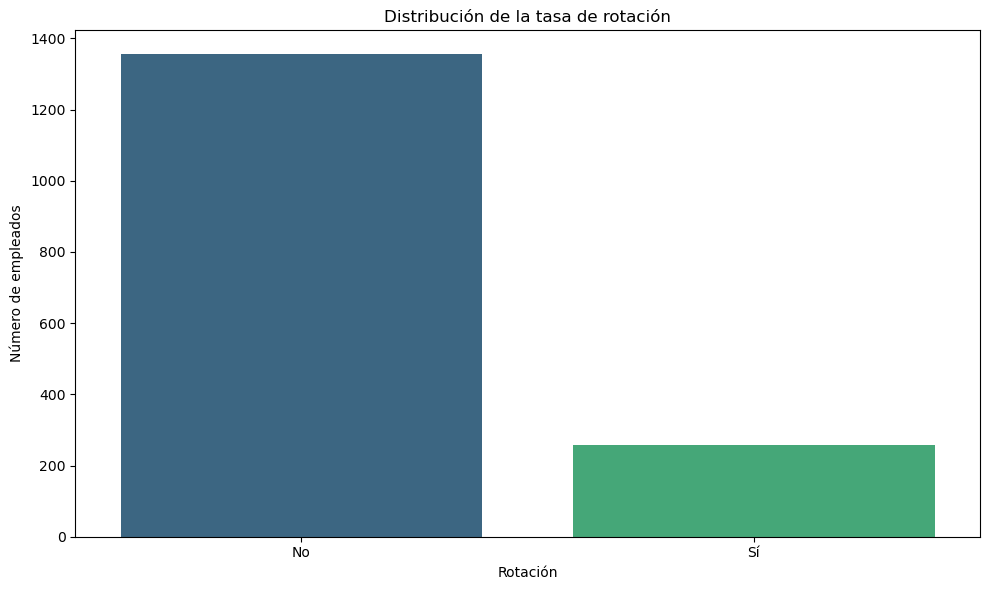

In [4]:
plt.figure(figsize=(10, 6)) # Tamaño de la gráfica
sns.countplot(x="attrition",
              data=df_analisis,
              palette="viridis")

# Personalizar el gráfico
plt.title('Distribución de la tasa de rotación')
plt.xlabel('Rotación')
plt.ylabel('Número de empleados')
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Descripción:

- Este gráfico inicial proporciona una visión general clara de la distribución de la rotación, destacando un desequilibrio hacia la permanencia, pero también señalando la presencia de una tasa de rotación que merece una investigación más detallada.

2. ¿Cuál es la distribución de los niveles de satisfacción?

In [5]:
df_analisis[['jobsatisfaction', 'environmentsatisfaction', 'relationshipsatisfaction']]

,jobsatisfaction,environmentsatisfaction,relationshipsatisfaction
0,3,1,3
1,3,3,1
2,4,3,4
3,3,1,2
4,1,1,4
...,...,...,...
1609,4,3,1
1610,2,3,2
1611,3,13,4
1612,4,1,4


In [6]:
df_analisis['environmentsatisfaction'].unique()

array([ 1,  3,  4,  2, 42, 37, 35, 25, 27, 31, 39, 21, 15, 14, 33, 19, 12,
       13, 28, 47, 36, 29, 24, 46, 16, 22, 41, 49, 11, 48, 18, 10, 45, 38,
       17, 20, 26, 43], dtype=int64)

In [7]:
# Convertir la columna a tipo cadena
df_analisis['environmentsatisfaction'] = df_analisis['environmentsatisfaction'].astype(str)

# Extraer el primer dígito utilizando slicing de cadenas
df_analisis['environmentsatisfaction'] = df_analisis['environmentsatisfaction'].str[0]

# Convertir la columna a tipo númerico
df_analisis['environmentsatisfaction'] = df_analisis['environmentsatisfaction'].astype(int)

df_analisis['environmentsatisfaction'].unique()

array([1, 3, 4, 2])

In [8]:

# Asumiendo que df_analisis tiene las columnas numéricas originales
tabla_distribucion_num = pd.DataFrame({
    'Satisfacción Laboral': df_analisis['jobsatisfaction'].value_counts().sort_index(),
    'Satisfacción Ambiental': df_analisis['environmentsatisfaction'].value_counts().sort_index(),
    'Satisfacción de Relaciones': df_analisis['relationshipsatisfaction'].value_counts().sort_index()
})

mapeo_satisfaccion = {
    1: "Muy Insatisfecho",
    2: "Insatisfecho",
    3: "Satisfecho",
    4: "Muy Satisfecho"
}

tabla_distribucion_reindexada = tabla_distribucion_num.rename(index=mapeo_satisfaccion)

tabla_distribucion_reindexada

,Satisfacción Laboral,Satisfacción Ambiental,Satisfacción de Relaciones
Muy Insatisfecho,317,332,303
Insatisfecho,302,319,339
Satisfecho,481,477,504
Muy Satisfecho,514,486,468


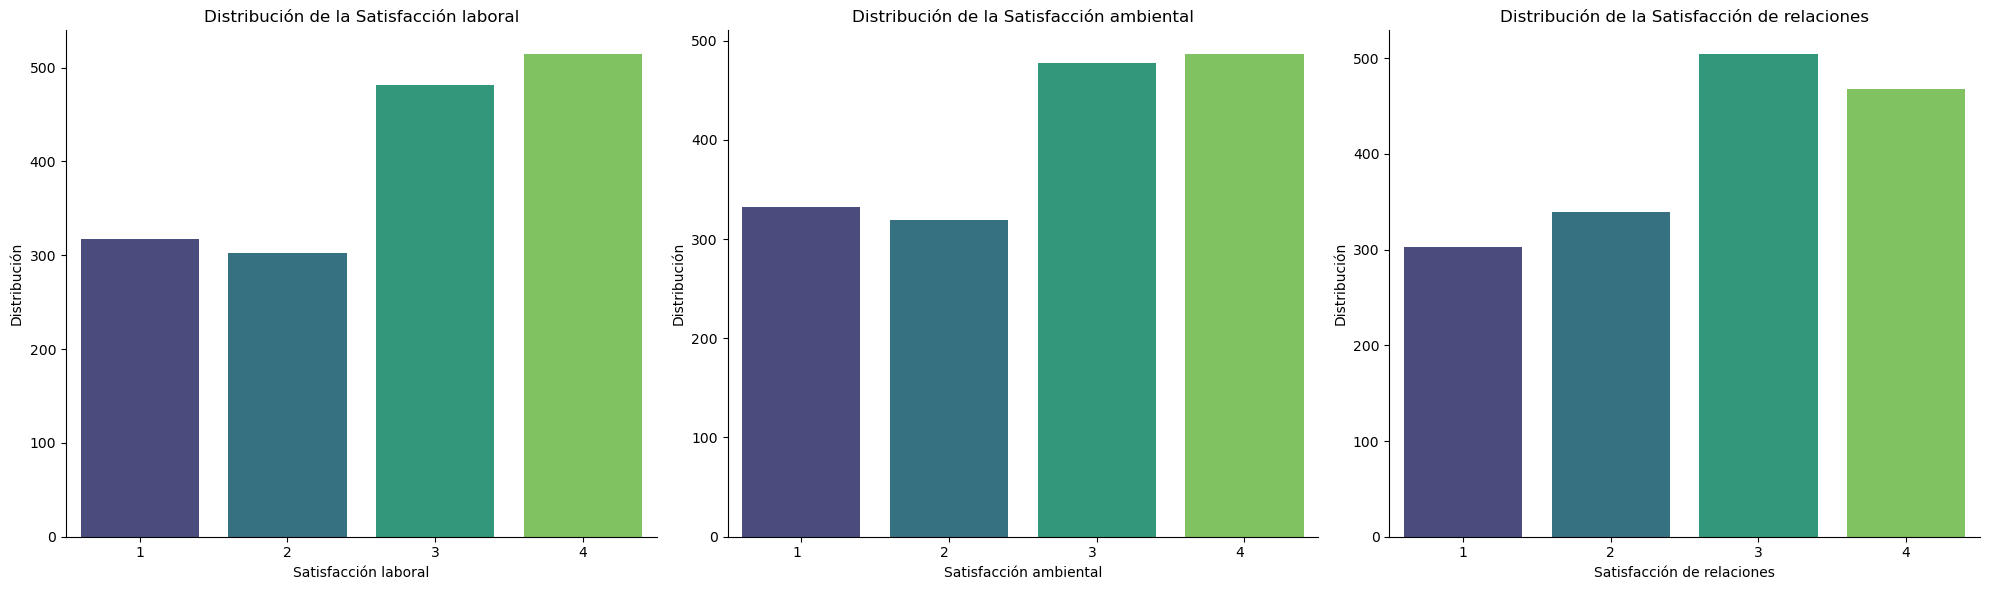

In [9]:

# 1. Crear una figura con tres subplots dispuestos horizontalmente
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# 2. Primer countplot, gráfico de barras para Satisfacción laboral
sns.countplot(x='jobsatisfaction',
              data=df_analisis,
              palette="viridis",
              ax=axes[0])

axes[0].set_xlabel("Satisfacción laboral")
axes[0].set_ylabel("Distribución")
axes[0].tick_params(axis='x', rotation=0)  # Solo la rotación
axes[0].set_title("Distribución de la Satisfacción laboral")
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)

# Acceder a las etiquetas del eje x y establecer la alineación horizontal
for label in axes[0].get_xticklabels():
    label.set_ha('center')

# 3. Segundo countplot, gráfico de barras para Satisfacción ambiental
sns.countplot(x='environmentsatisfaction',
              data=df_analisis,
              palette="viridis",
              ax=axes[1])

axes[1].set_xlabel("Satisfacción ambiental")
axes[1].set_ylabel("Distribución")
axes[1].tick_params(axis='x', rotation=0)
axes[1].set_title("Distribución de la Satisfacción ambiental")
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)

# Acceder a las etiquetas del eje x y establecer la alineación horizontal
for label in axes[1].get_xticklabels():
    label.set_ha('right')  # Alineación a la derecha para etiquetas rotadas

# 4. Tercer countplot, gráfico de barras para Satisfacción de relaciones
sns.countplot(x='relationshipsatisfaction',
              data=df_analisis,
              palette="viridis",
              ax=axes[2])

axes[2].set_xlabel("Satisfacción de relaciones")
axes[2].set_ylabel("Distribución")
axes[2].tick_params(axis='x', rotation=0)
axes[2].set_title("Distribución de la Satisfacción de relaciones")
axes[2].spines['right'].set_visible(False)
axes[2].spines['top'].set_visible(False)

# Acceder a las etiquetas del eje x y establecer la alineación horizontal
for label in axes[2].get_xticklabels():
    label.set_ha('center')

plt.tight_layout()
plt.show()

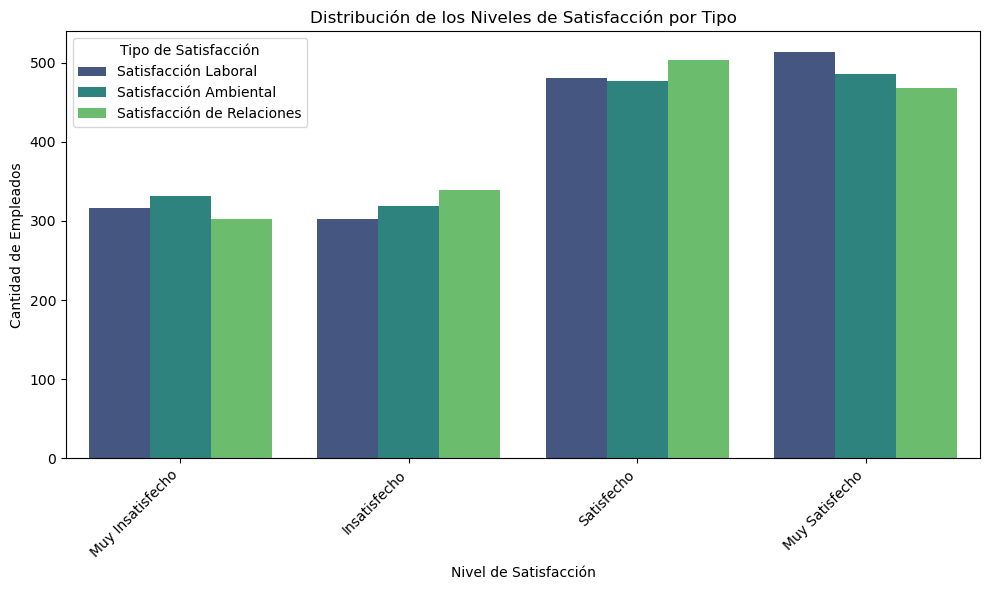

In [10]:

# Resetear el índice para convertirlo en una columna
tabla_distribucion_reindexada = tabla_distribucion_reindexada.reset_index()
tabla_distribucion_reindexada = tabla_distribucion_reindexada.rename(columns={'index': 'Nivel de Satisfacción'})

# Fundir el DataFrame para seaborn
df_melted = tabla_distribucion_reindexada.melt(
    id_vars='Nivel de Satisfacción',
    value_vars=['Satisfacción Laboral', 'Satisfacción Ambiental', 'Satisfacción de Relaciones'],
    var_name='Tipo de Satisfacción',
    value_name='Cantidad'
)

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Nivel de Satisfacción',
    y='Cantidad',
    hue='Tipo de Satisfacción',
    data=df_melted,
    palette='viridis'
)

# Personalizar el gráfico
plt.title('Distribución de los Niveles de Satisfacción por Tipo')
plt.xlabel('Nivel de Satisfacción')
plt.ylabel('Cantidad de Empleados')
plt.legend(title='Tipo de Satisfacción')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Descripción:

- La mayoría de los empleados tienden a reportar niveles más altos de satisfacción, aunque existen diferencias sutiles en la distribución entre los tres tipos de satisfacción. La Satisfacción Laboral muestra el aumento más pronunciado hacia el nivel más alto, mientras que la Satisfacción de Relaciones muestra una ligera disminución en el nivel "Muy Satisfecho" en comparación con "Satisfecho".

3. ¿Cuál es la proporción de empleados que abandonan la empresa en cada nivel de satisfacción laboral?

In [11]:
df_analisis['attrition'].value_counts()

attrition
No     1355
Yes     259
Name: count, dtype: int64

In [12]:
# Crear una columna categórica de satisfacción laboral si no existe
bins = 4
labels = ["Muy Insatisfecho", "Insatisfecho", "Satisfecho", "Muy Satisfecho"]
df_analisis["Satisfacción laboral"] = pd.cut(df_analisis['jobsatisfaction'], bins=bins, labels=labels, include_lowest=True)

# Crear la tabla de distribución cruzada entre nivel de satisfacción y rotación
tabla_distribucion = pd.crosstab(
    index=df_analisis['Satisfacción laboral'],
    columns=df_analisis['attrition'],
    values=df_analisis['employee_id'],  # Puedes usar cualquier columna para contar
    aggfunc='count'
)
tabla_distribucion

attrition,No,Yes
Satisfacción laboral,,
Muy Insatisfecho,247,70
Insatisfecho,249,53
Satisfecho,405,76
Muy Satisfecho,454,60


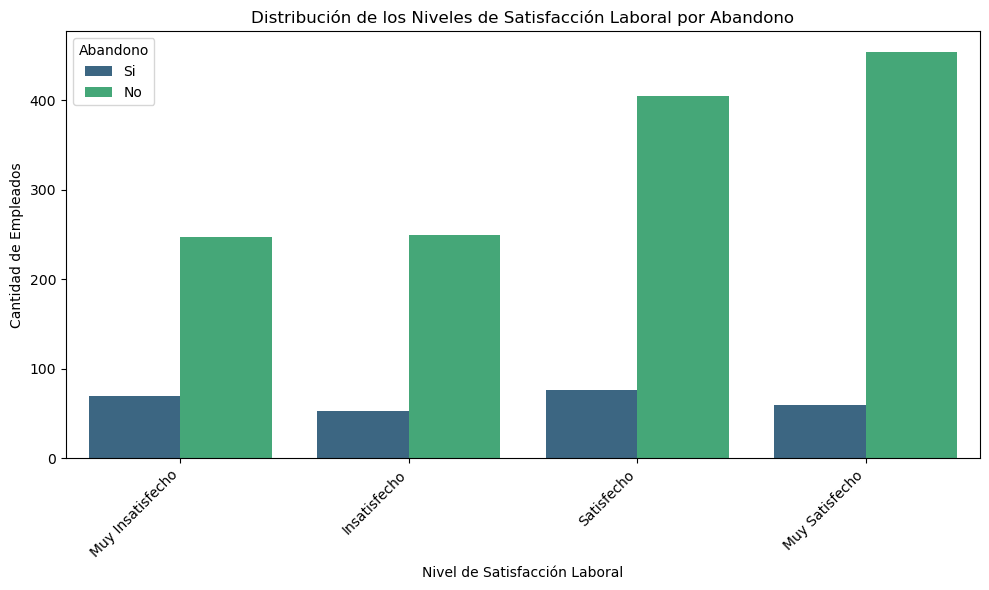

In [13]:

# Crear una columna categórica de satisfacción laboral si no existe
bins = 4
labels = ["Muy Insatisfecho", "Insatisfecho", "Satisfecho", "Muy Satisfecho"]
df_analisis["satisfacción_laboral_cat"] = pd.cut(df_analisis['jobsatisfaction'], bins=bins, labels=labels, include_lowest=True)

# Crear la tabla de distribución cruzada entre nivel de satisfacción y rotación
tabla_distribucion = pd.crosstab(
    index=df_analisis['satisfacción_laboral_cat'],
    columns=df_analisis['attrition'],
    values=df_analisis['employee_id'],  # Puedes usar cualquier columna para contar
    aggfunc='count'
)

# Renombrar las columnas para que coincidan con tu código de melt
tabla_distribucion = tabla_distribucion.rename(columns={'Yes': 'Si', 'No': 'No'})

# Resetear el índice para convertirlo en una columna 'Nivel de Satisfacción'
tabla_distribucion_reindexada = tabla_distribucion.reset_index()
tabla_distribucion_reindexada = tabla_distribucion_reindexada.rename(columns={'satisfacción_laboral_cat': 'Nivel de Satisfacción'})

# Fundir el DataFrame para seaborn
df_melted = tabla_distribucion_reindexada.melt(
    id_vars='Nivel de Satisfacción',
    value_vars=['Si', 'No'],
    var_name='Rotación',
    value_name='Cantidad'
)

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Nivel de Satisfacción',
    y='Cantidad',
    hue='Rotación',
    data=df_melted,
    palette='viridis'
)

# Personalizar el gráfico
plt.title('Distribución de los Niveles de Satisfacción Laboral por Abandono')
plt.xlabel('Nivel de Satisfacción Laboral')
plt.ylabel('Cantidad de Empleados')
plt.legend(title='Abandono')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Descripción:

- Esta gráfica proporciona una evidencia visual fuerte de que la `satisfacción laboral es un factor clave que influye en la retención de empleados.` Los empleados que reportan niveles más bajos de satisfacción laboral tienen una probabilidad mucho mayor de abandonar la empresa, mientras que aquellos que están satisfechos o muy satisfechos tienen una probabilidad significativamente menor de hacerlo.

4. ¿Cuál es la proporción de empleados que abandonan la empresa en cada nivel de satisfacción ambiental?

In [14]:
# Crear una columna categórica de satisfacción laboral si no existe
bins = 4
labels = ["Muy Insatisfecho", "Insatisfecho", "Satisfecho", "Muy Satisfecho"]
df_analisis["Satisfacción ambiental"] = pd.cut(df_analisis['environmentsatisfaction'], bins=bins, labels=labels, include_lowest=True)

# Crear la tabla de distribución cruzada
tabla_distribucion = pd.crosstab(
    index=df_analisis['Satisfacción ambiental'],
    columns=df_analisis['attrition'],
    values=df_analisis['employee_id'],
    aggfunc='count'
)
tabla_distribucion

attrition,No,Yes
Satisfacción ambiental,,
Muy Insatisfecho,249,83
Insatisfecho,272,47
Satisfecho,410,67
Muy Satisfecho,424,62


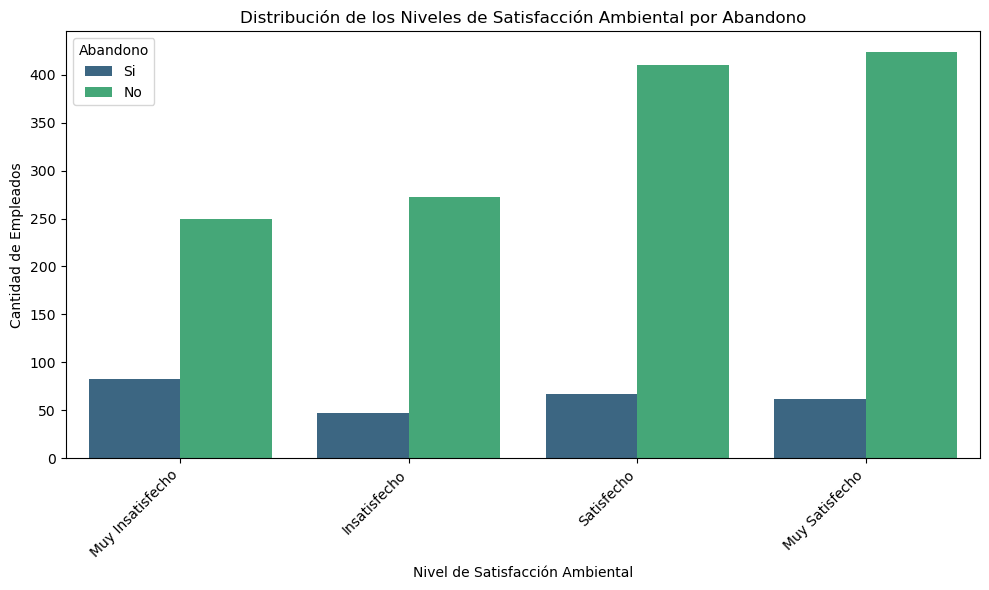

In [15]:
# Crear una columna categórica de satisfacción laboral si no existe
bins = 4
labels = ["Muy Insatisfecho", "Insatisfecho", "Satisfecho", "Muy Satisfecho"]
df_analisis["satisfacción_ambiental_cat"] = pd.cut(df_analisis['environmentsatisfaction'], bins=bins, labels=labels, include_lowest=True)

# Crear la tabla de distribución cruzada
tabla_distribucion = pd.crosstab(
    index=df_analisis['satisfacción_ambiental_cat'],
    columns=df_analisis['attrition'],
    values=df_analisis['employee_id'],
    aggfunc='count'
)

# Renombrar las columnas de abandono
tabla_distribucion = tabla_distribucion.rename(columns={'Yes': 'Si', 'No': 'No'})

# Resetear el índice y renombrar la columna de satisfacción
tabla_distribucion_reindexada = tabla_distribucion.reset_index()
tabla_distribucion_reindexada = tabla_distribucion_reindexada.rename(columns={'satisfacción_ambiental_cat': 'Nivel de Satisfacción'})

# Fundir el DataFrame para seaborn
df_melted = tabla_distribucion_reindexada.melt(
    id_vars='Nivel de Satisfacción',
    value_vars=['Si', 'No'],
    var_name='Rotación',
    value_name='Cantidad'
)

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Nivel de Satisfacción',
    y='Cantidad',
    hue='Rotación',
    data=df_melted,
    palette='viridis'
)

# Personalizar el gráfico
plt.title('Distribución de los Niveles de Satisfacción Ambiental por Abandono')
plt.xlabel('Nivel de Satisfacción Ambiental')
plt.ylabel('Cantidad de Empleados')
plt.legend(title='Abandono')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Descripción:

- La gráfica sugiere que la satisfacción ambiental es un factor importante que influye en la retención de empleados. Los empleados con niveles más bajos de satisfacción ambiental muestran una mayor propensión a abandonar la empresa, mientras que aquellos que están satisfechos o muy satisfechos con su entorno de trabajo son mucho más propensos a permanecer.

5. ¿Cuál es la proporción de empleados que abandonan la empresa en cada nivel de satisfacción de relaciones?

In [16]:
# Crear una columna categórica de satisfacción de relaciones
bins = 4
labels = ["Muy Insatisfecho", "Insatisfecho", "Satisfecho", "Muy Satisfecho"]
df_analisis["Satisfacción de relaciones"] = pd.cut(df_analisis['relationshipsatisfaction'], bins=bins, labels=labels, include_lowest=True)

# Crear la tabla de distribución cruzada
tabla_distribucion = pd.crosstab(
    index=df_analisis["Satisfacción de relaciones"],
    columns=df_analisis['attrition'],
    values=df_analisis['employee_id'],
    aggfunc='count'
)
tabla_distribucion

attrition,No,Yes
Satisfacción de relaciones,,
Muy Insatisfecho,242,61
Insatisfecho,290,49
Satisfecho,426,78
Muy Satisfecho,397,71


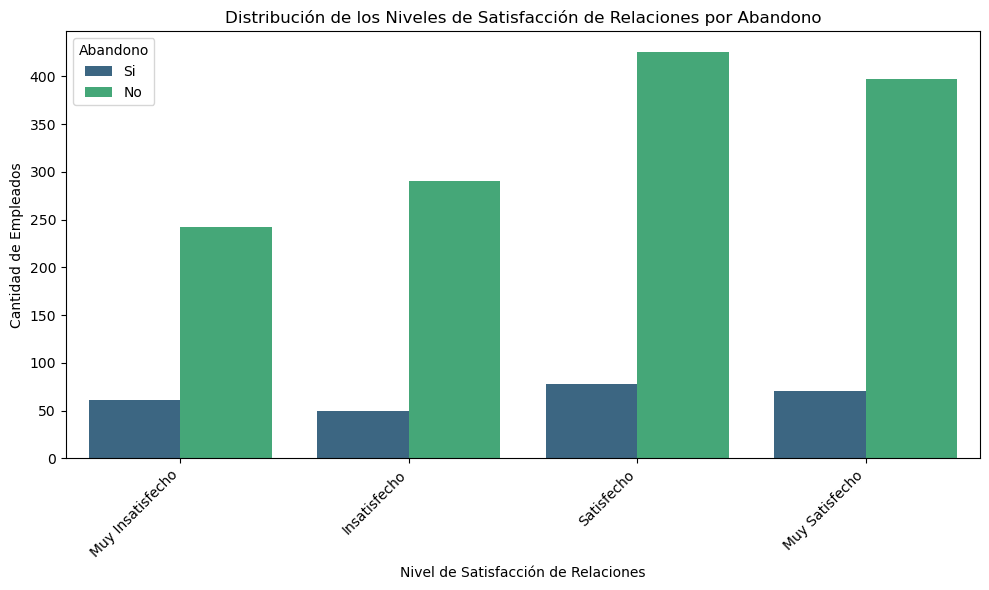

In [17]:
# Crear una columna categórica de satisfacción de relaciones
bins = 4
labels = ["Muy Insatisfecho", "Insatisfecho", "Satisfecho", "Muy Satisfecho"]
df_analisis["satisfacción_relaciones_cat"] = pd.cut(df_analisis['relationshipsatisfaction'], bins=bins, labels=labels, include_lowest=True)

# Crear la tabla de distribución cruzada
tabla_distribucion = pd.crosstab(
    index=df_analisis['satisfacción_relaciones_cat'],
    columns=df_analisis['attrition'],
    values=df_analisis['employee_id'],
    aggfunc='count'
)

# Renombrar las columnas de abandono
tabla_distribucion = tabla_distribucion.rename(columns={'Yes': 'Si', 'No': 'No'})

# Resetear el índice y renombrar la columna de satisfacción
tabla_distribucion_reindexada = tabla_distribucion.reset_index()
tabla_distribucion_reindexada = tabla_distribucion_reindexada.rename(columns={'satisfacción_relaciones_cat': 'Nivel de Satisfacción'})

# Fundir el DataFrame para seaborn
df_melted = tabla_distribucion_reindexada.melt(
    id_vars='Nivel de Satisfacción',
    value_vars=['Si', 'No'],
    var_name='Rotación',
    value_name='Cantidad'
)

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Nivel de Satisfacción',
    y='Cantidad',
    hue='Rotación',
    data=df_melted,
    palette='viridis'
)

# Personalizar el gráfico
plt.title('Distribución de los Niveles de Satisfacción de Relaciones por Abandono')
plt.xlabel('Nivel de Satisfacción de Relaciones')
plt.ylabel('Cantidad de Empleados')
plt.legend(title='Abandono')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Descripción:

- Esta gráfica refuerza la idea de que la satisfacción en las relaciones laborales es un factor importante para la retención de empleados. Los empleados que se sienten insatisfechos con sus relaciones en el trabajo tienen una mayor probabilidad de abandonar la empresa, mientras que aquellos que están satisfechos o muy satisfechos son más propensos a quedarse.

6. ¿Cuál es la satisacción laboral según los departamentos?

In [18]:
df_analisis['department'].value_counts()

department
research & development     196
sales                       91
human resources             15
Name: count, dtype: int64

In [19]:
# Crear la columna categórica de satisfacción laboral si no existe
bins = 4
labels = ["Muy Insatisfecho", "Insatisfecho", "Satisfecho", "Muy Satisfecho"]
df_analisis["Nivel de Satisfacción"] = pd.cut(df_analisis['jobsatisfaction'], bins=bins, labels=labels, include_lowest=True)

# Crear la tabla de distribución cruzada
tabla_distribucion = pd.crosstab(
    index=df_analisis['department'],
    columns=df_analisis['Nivel de Satisfacción'],
    values=df_analisis['employee_id'],
    aggfunc='count'
)

# Renombrar las columnas para que coincidan con el español
tabla_distribucion = tabla_distribucion.rename(columns={
    'Research & Development': 'Investigación y desarrollo',
    'Sales': 'Ventas',
    'Human Resources': 'Recursos humanos'
})

tabla_distribucion

Nivel de Satisfacción,Muy Insatisfecho,Insatisfecho,Satisfecho,Muy Satisfecho
department,,,,
human resources,5,4,3,3
research & development,31,31,67,67
sales,17,20,27,27


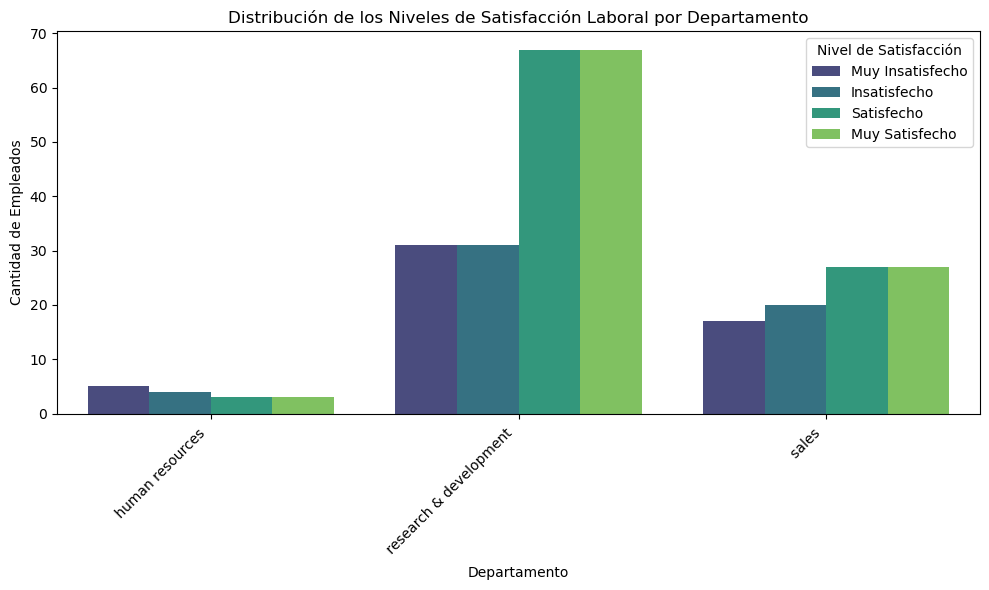

In [20]:
# Crear la columna categórica de satisfacción laboral
bins = 4
labels = ["Muy Insatisfecho", "Insatisfecho", "Satisfecho", "Muy Satisfecho"]
df_analisis["Nivel de Satisfacción"] = pd.cut(df_analisis['jobsatisfaction'], bins=bins, labels=labels, include_lowest=True)

# Crear la tabla de distribución cruzada (departamentos como índice, satisfacción como columnas)
tabla_distribucion = pd.crosstab(
    index=df_analisis['department'],
    columns=df_analisis['Nivel de Satisfacción'],
    values=df_analisis['employee_id'],
    aggfunc='count'
)

# Renombrar el índice a 'Departamento'
tabla_distribucion_reindexada = tabla_distribucion.reset_index().rename(columns={'department': 'Departamento'})

# Fundir el DataFrame para seaborn
df_melted = tabla_distribucion_reindexada.melt(
    id_vars='Departamento',
    value_vars=['Muy Insatisfecho', 'Insatisfecho', 'Satisfecho', 'Muy Satisfecho'],
    var_name='Nivel de Satisfacción',
    value_name='Cantidad'
)

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Departamento',
    y='Cantidad',
    hue='Nivel de Satisfacción',
    data=df_melted,
    palette='viridis'
)

# Personalizar el gráfico
plt.title('Distribución de los Niveles de Satisfacción Laboral por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Cantidad de Empleados')
plt.legend(title='Nivel de Satisfacción')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

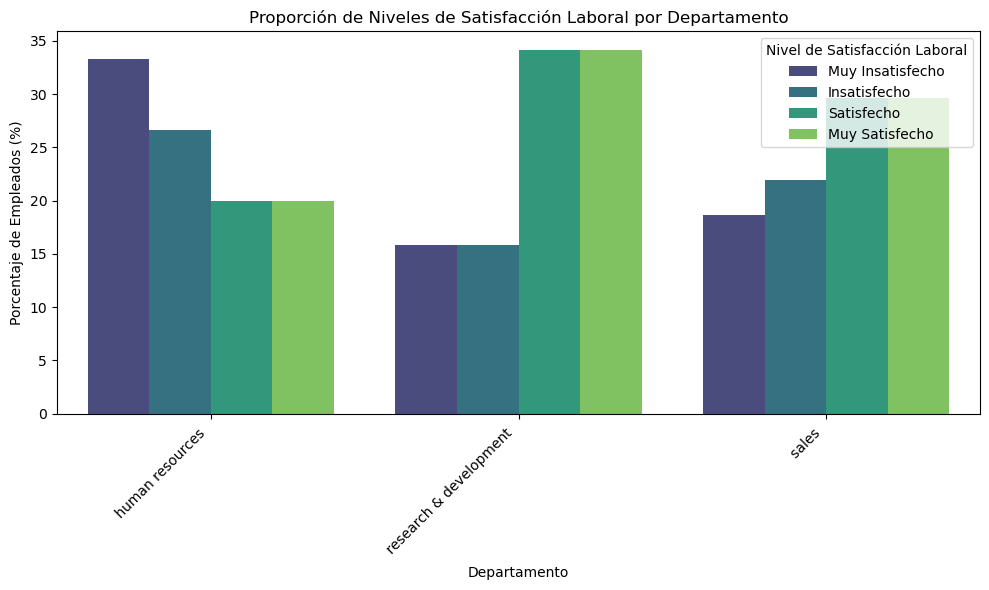

In [37]:
bins = 4
labels = ["Muy Insatisfecho", "Insatisfecho", "Satisfecho", "Muy Satisfecho"]
df_analisis["Nivel de Satisfacción Laboral"] = pd.cut(
    df_analisis['jobsatisfaction'], bins=bins, labels=labels, include_lowest=True
)

# Calcular la proporción de empleados por departamento y nivel de satisfacción laboral
tabla_proporcion = df_analisis.groupby('department')['Nivel de Satisfacción Laboral'].value_counts(normalize=True).mul(100).rename('Porcentaje').reset_index()

# Crear el gráfico de barras agrupadas de proporciones
plt.figure(figsize=(10, 6))
sns.barplot(
    data=tabla_proporcion,
    x='department',
    y='Porcentaje',
    hue='Nivel de Satisfacción Laboral',
    palette='viridis'
)

# Personalizar el gráfico
plt.title('Proporción de Niveles de Satisfacción Laboral por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Porcentaje de Empleados (%)')
plt.legend(title='Nivel de Satisfacción Laboral')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Destribución:

- La alta proporción de empleados con baja satisfacción laboral en recursos humanos indica que este departamento podría ser una prioridad para investigar las causas de la insatisfacción y implementar medidas correctivas.

- La alta proporción de empleados satisfechos y muy satisfechos en investigación y desarrollo podría señalar prácticas laborales o condiciones que son efectivas y podrían considerarse para otros departamentos.

- El fuerte desempeño en los niveles altos de satisfacción en ventas también es un punto positivo a analizar para identificar posibles factores de éxito.

7. ¿Cuál es la satisacción ambiental según los departamentos?

In [21]:
df_analisis['department'].value_counts()

department
research & development     196
sales                       91
human resources             15
Name: count, dtype: int64

In [22]:
# Crear la columna categórica de satisfacción laboral si no existe
bins = 4
labels = ["Muy Insatisfecho", "Insatisfecho", "Satisfecho", "Muy Satisfecho"]
df_analisis["Nivel de Satisfacción"] = pd.cut(df_analisis['environmentsatisfaction'], bins=bins, labels=labels, include_lowest=True)

# Crear la tabla de distribución cruzada
tabla_distribucion = pd.crosstab(
    index=df_analisis['department'],
    columns=df_analisis['Nivel de Satisfacción'],
    values=df_analisis['employee_id'],
    aggfunc='count'
)

# Renombrar las columnas para que coincidan con el español
tabla_distribucion = tabla_distribucion.rename(columns={
    'Research & Development': 'Investigación y desarrollo',
    'Sales': 'Ventas',
    'Human Resources': 'Recursos humanos'
})

tabla_distribucion

Nivel de Satisfacción,Muy Insatisfecho,Insatisfecho,Satisfecho,Muy Satisfecho
department,,,,
human resources,0,4,7,4
research & development,47,34,70,45
sales,14,26,17,34


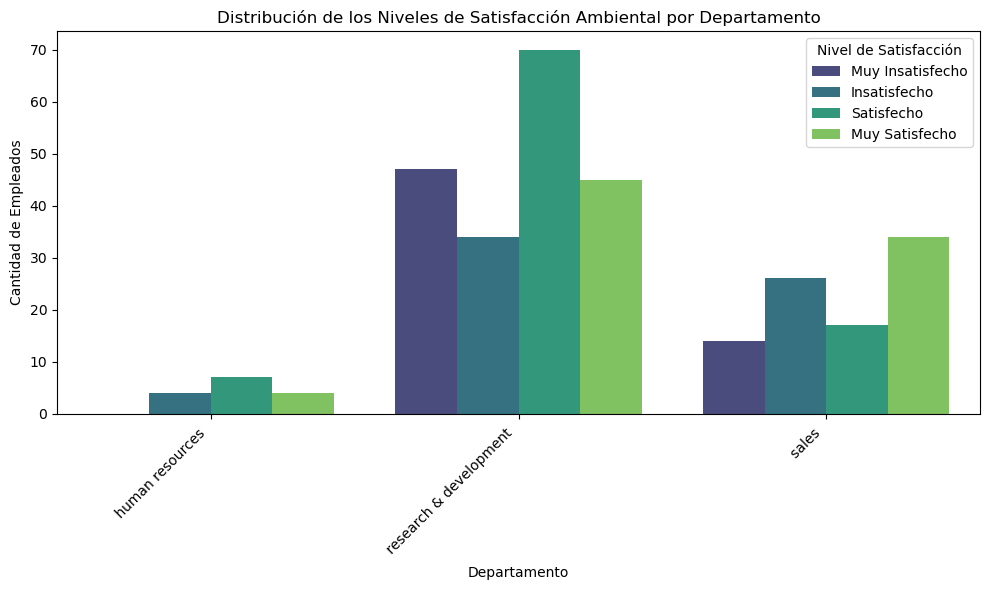

In [23]:
# Crear la columna categórica de satisfacción laboral
bins = 4
labels = ["Muy Insatisfecho", "Insatisfecho", "Satisfecho", "Muy Satisfecho"]
df_analisis["Nivel de Satisfacción"] = pd.cut(df_analisis['environmentsatisfaction'], bins=bins, labels=labels, include_lowest=True)

# Crear la tabla de distribución cruzada (departamentos como índice, satisfacción como columnas)
tabla_distribucion = pd.crosstab(
    index=df_analisis['department'],
    columns=df_analisis['Nivel de Satisfacción'],
    values=df_analisis['employee_id'],
    aggfunc='count'
)

# Renombrar el índice a 'Departamento'
tabla_distribucion_reindexada = tabla_distribucion.reset_index().rename(columns={'department': 'Departamento'})

# Fundir el DataFrame para seaborn
df_melted = tabla_distribucion_reindexada.melt(
    id_vars='Departamento',
    value_vars=['Muy Insatisfecho', 'Insatisfecho', 'Satisfecho', 'Muy Satisfecho'],
    var_name='Nivel de Satisfacción',
    value_name='Cantidad'
)

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Departamento',
    y='Cantidad',
    hue='Nivel de Satisfacción',
    data=df_melted,
    palette='viridis'
)

# Personalizar el gráfico
plt.title('Distribución de los Niveles de Satisfacción Ambiental por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Cantidad de Empleados')
plt.legend(title='Nivel de Satisfacción')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

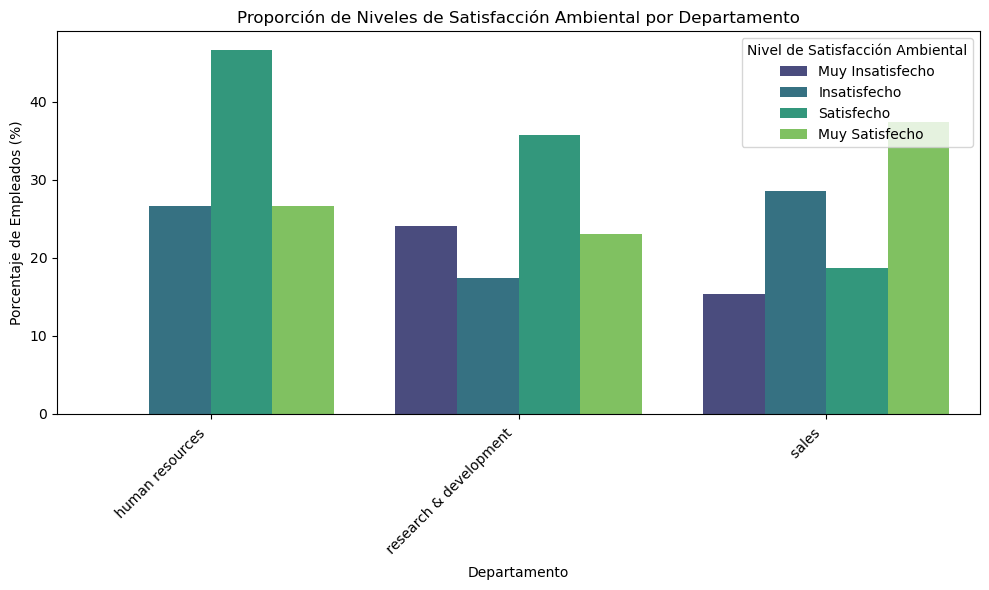

In [24]:

# Crear la columna categórica de satisfacción ambiental
bins = 4
labels = ["Muy Insatisfecho", "Insatisfecho", "Satisfecho", "Muy Satisfecho"]
df_analisis["Nivel de Satisfacción Ambiental"] = pd.cut(
    df_analisis['environmentsatisfaction'], bins=bins, labels=labels, include_lowest=True
)

# Calcular la proporción de empleados por departamento y nivel de satisfacción
tabla_proporcion = df_analisis.groupby('department')['Nivel de Satisfacción Ambiental'].value_counts(normalize=True).mul(100).rename('Porcentaje').reset_index()

# Crear el gráfico de barras agrupadas de proporciones
plt.figure(figsize=(10, 6))
sns.barplot(
    data=tabla_proporcion,
    x='department',
    y='Porcentaje',
    hue='Nivel de Satisfacción Ambiental',
    palette='viridis'
)

# Personalizar el gráfico
plt.title('Proporción de Niveles de Satisfacción Ambiental por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Porcentaje de Empleados (%)')
plt.legend(title='Nivel de Satisfacción Ambiental')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Descripción:

- La alta proporción de empleados insatisfechos en recursos humanos sugiere que este departamento podría necesitar una atención prioritaria en cuanto a mejoras en el entorno laboral.

- La alta proporción de empleados satisfechos en investigación y desarrollo podría indicar prácticas o condiciones ambientales positivas en este departamento que podrían replicarse en otros.

- La alta proporción de empleados muy satisfechos en ventas también es un punto positivo a considerar.

8. ¿Cuál es la satisacción de relaciones según los departamentos?

In [25]:
df_analisis['department'].value_counts()

department
research & development     196
sales                       91
human resources             15
Name: count, dtype: int64

In [ ]:

bins = 4
labels = ["Muy Insatisfecho", "Insatisfecho", "Satisfecho", "Muy Satisfecho"]
df_analisis["Nivel de Satisfacción"] = pd.cut(df_analisis['relationshipsatisfaction'], bins=bins, labels=labels, include_lowest=True)

# Crear la tabla de distribución cruzada
tabla_distribucion = pd.crosstab(
    index=df_analisis['department'],
    columns=df_analisis['Nivel de Satisfacción'],
    values=df_analisis['employee_id'],
    aggfunc='count'
)

# Renombrar las columnas para que coincidan con el español
tabla_distribucion = tabla_distribucion.rename(columns={
    'Research & Development': 'Investigación y desarrollo',
    'Sales': 'Ventas',
    'Human Resources': 'Recursos humanos'
})

tabla_distribucion

Nivel de Satisfacción,Muy Insatisfecho,Insatisfecho,Satisfecho,Muy Satisfecho
department,,,,
human resources,3,2,5,5
research & development,31,55,50,60
sales,21,15,23,32


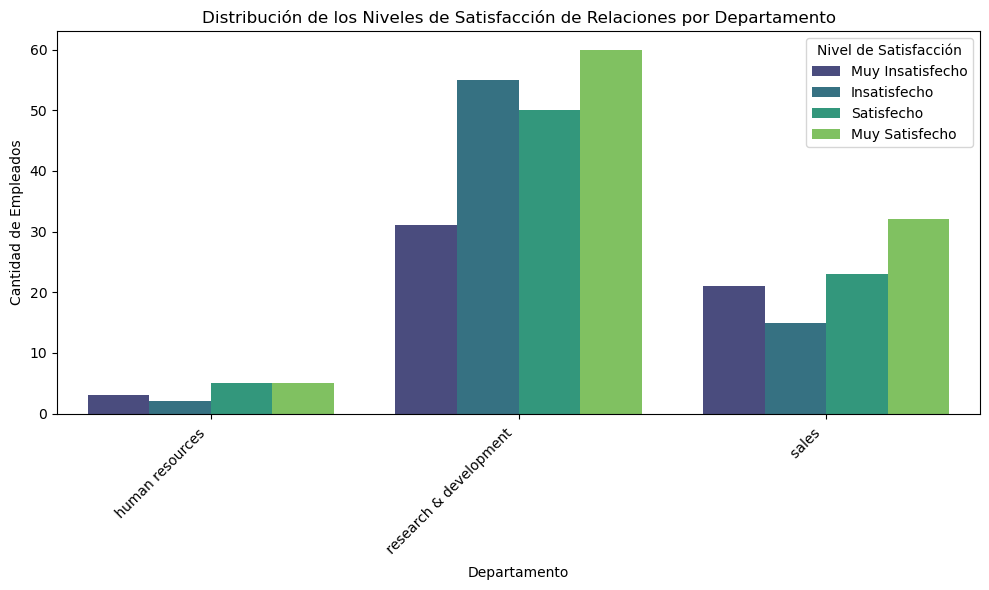

In [27]:
# Crear la columna categórica de satisfacción laboral
bins = 4
labels = ["Muy Insatisfecho", "Insatisfecho", "Satisfecho", "Muy Satisfecho"]
df_analisis["Nivel de Satisfacción"] = pd.cut(df_analisis['relationshipsatisfaction'], bins=bins, labels=labels, include_lowest=True)

# Crear la tabla de distribución cruzada (departamentos como índice, satisfacción como columnas)
tabla_distribucion = pd.crosstab(
    index=df_analisis['department'],
    columns=df_analisis['Nivel de Satisfacción'],
    values=df_analisis['employee_id'],
    aggfunc='count'
)

# Renombrar el índice a 'Departamento'
tabla_distribucion_reindexada = tabla_distribucion.reset_index().rename(columns={'department': 'Departamento'})

# Fundir el DataFrame para seaborn
df_melted = tabla_distribucion_reindexada.melt(
    id_vars='Departamento',
    value_vars=['Muy Insatisfecho', 'Insatisfecho', 'Satisfecho', 'Muy Satisfecho'],
    var_name='Nivel de Satisfacción',
    value_name='Cantidad'
)

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Departamento',
    y='Cantidad',
    hue='Nivel de Satisfacción',
    data=df_melted,
    palette='viridis'
)

# Personalizar el gráfico
plt.title('Distribución de los Niveles de Satisfacción de Relaciones por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Cantidad de Empleados')
plt.legend(title='Nivel de Satisfacción')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

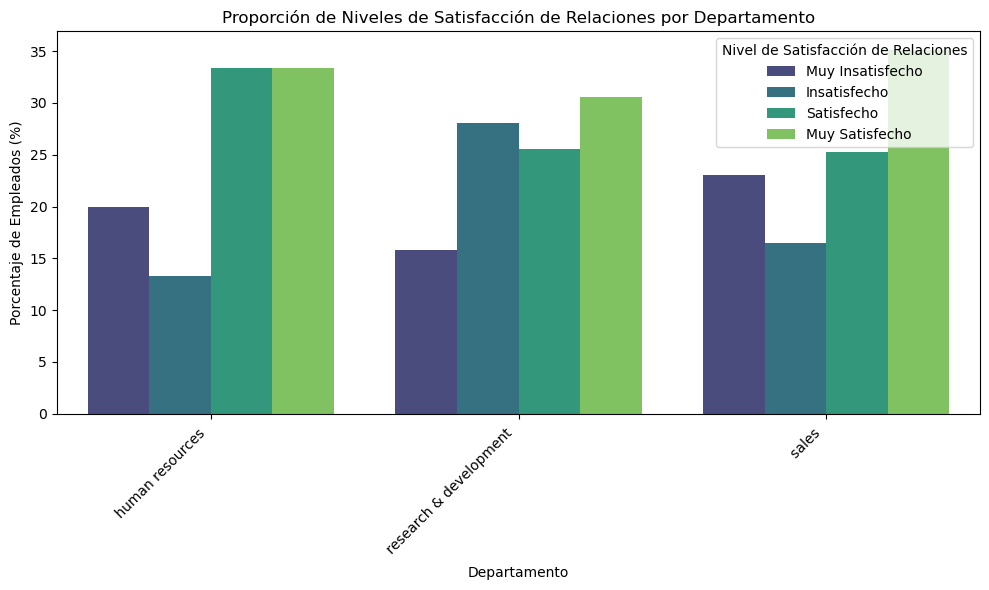

In [38]:

# Crear la columna categórica de satisfacción de relaciones
bins = 4
labels = ["Muy Insatisfecho", "Insatisfecho", "Satisfecho", "Muy Satisfecho"]
df_analisis["Nivel de Satisfacción de Relaciones"] = pd.cut(
    df_analisis['relationshipsatisfaction'], bins=bins, labels=labels, include_lowest=True
)

# Calcular la proporción de empleados por departamento y nivel de satisfacción de relaciones
tabla_proporcion = df_analisis.groupby('department')['Nivel de Satisfacción de Relaciones'].value_counts(normalize=True).mul(100).rename('Porcentaje').reset_index()

# Crear el gráfico de barras agrupadas de proporciones
plt.figure(figsize=(10, 6))
sns.barplot(
    data=tabla_proporcion,
    x='department',
    y='Porcentaje',
    hue='Nivel de Satisfacción de Relaciones',
    palette='viridis'
)

# Personalizar el gráfico
plt.title('Proporción de Niveles de Satisfacción de Relaciones por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Porcentaje de Empleados (%)')
plt.legend(title='Nivel de Satisfacción de Relaciones')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Descripción:

- La proporción relativamente alta de empleados insatisfechos en recursos humanos sugiere que este departamento podría beneficiarse de iniciativas para mejorar las relaciones laborales.

- La alta satisfacción de las relaciones en investigación y desarrollo podría indicar prácticas o una cultura de equipo positiva que podrían explorarse para su aplicación en otros departamentos.

- El buen desempeño en los niveles altos de satisfacción en ventas también es un punto fuerte a considerar.

9. ¿Cuál es la relación de Abandono por Años en la Empresa?

In [28]:
df_analisis[['yearsatcompany']].value_counts()

yearsatcompany
5                 208
1                 171
2                 141
3                 141
10                133
7                 115
4                 114
8                 106
9                  94
6                  78
0                  44
11                 36
20                 29
13                 26
15                 21
14                 19
22                 17
18                 15
12                 15
16                 14
21                 14
19                 12
17                  9
24                  7
25                  5
33                  5
26                  4
31                  3
36                  3
32                  3
27                  3
29                  2
23                  2
40                  2
30                  1
34                  1
37                  1
Name: count, dtype: int64

In [29]:
df_analisis[['attrition']].value_counts()

attrition
No           1355
Yes           259
Name: count, dtype: int64

In [30]:
attrition_count = df_analisis.groupby('yearsatcompany')['attrition'].value_counts().rename('Cantidad').reset_index()
attrition_count

,yearsatcompany,attrition,Cantidad
0,0,No,28
1,0,Yes,16
2,1,No,112
3,1,Yes,59
4,2,No,112
...,...,...,...
59,33,Yes,1
60,34,No,1
61,36,No,3
62,37,No,1


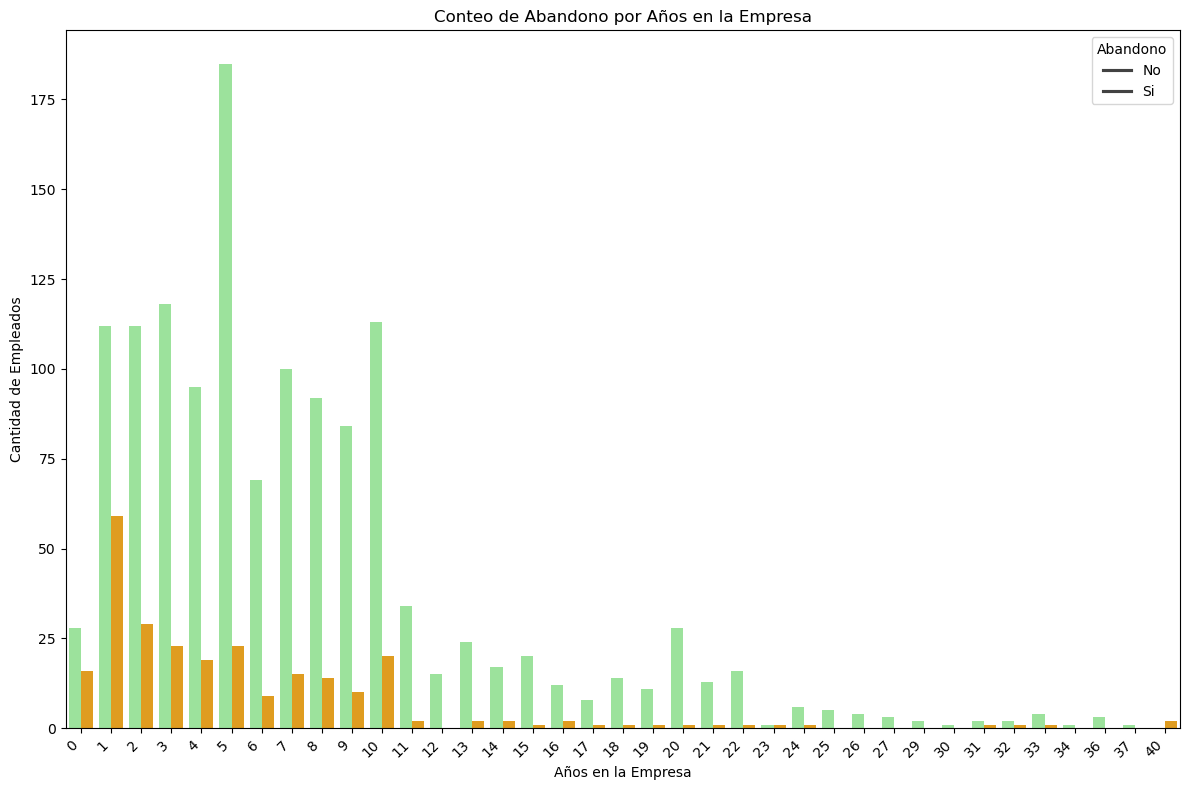

In [50]:

# Calcular el conteo de abandono por años en la empresa
attrition_count = df_analisis.groupby('yearsatcompany')['attrition'].value_counts().rename('Cantidad').reset_index()
palette = {'No': 'lightgreen', 'Yes': 'orange'}

plt.figure(figsize=(12, 8))
sns.barplot(data=attrition_count, 
            x='yearsatcompany', 
            y='Cantidad', 
            hue='attrition', 
            palette=palette)

plt.title('Conteo de Abandono por Años en la Empresa')

plt.xlabel('Años en la Empresa')
plt.ylabel('Cantidad de Empleados')
plt.legend(title='Abandono', labels=['No', 'Si'])
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Descripción:

- El periodo crítico para la retención son los primeros 5 años de empleo. Las estrategias de retención deben enfocarse especialmente en este grupo para reducir la rotación temprana.

- Fomentar la integración y el desarrollo temprano es crucial. Abordar las posibles razones del alto abandono en los primeros años (como la claridad de roles, el apoyo de los superiores, las oportunidades de crecimiento) podría tener un impacto significativo.

- La antigüedad en la empresa parece generar lealtad y compromiso. Los empleados que permanecen durante más tiempo son mucho menos propensos a abandonar.

- Las estrategias de retención a largo plazo deben enfocarse en mantener el compromiso y la satisfacción de los empleados con más antigüedad. Aunque la tasa de abandono es baja, entender las razones detrás de las salidas tardías podría ser valioso.

10. ¿ Cuál es la relación de los Niveles de Satisfacción laboral con el Nivel de empleo?

In [32]:
df_analisis.groupby(['jobsatisfaction', 'joblevel'])[['$_salary']].mean()

$_salary
jobsatisfaction joblevel               
1               1          33227.201606
                2          55538.192658
                3          96112.956727
                4         142670.858813
                5         180925.129886
2               1          29031.217186
                2          55674.900810
                3          91995.301369
                4         142290.824840
                5         166810.007432
3               1          31187.011200
                2          54704.223051
                3          97742.701387
                4         152121.102383
                5         179903.971852
4               1          32970.910690
                2          55579.204167
                3         100862.782206
                4         144707.436346
                5         183372.627751

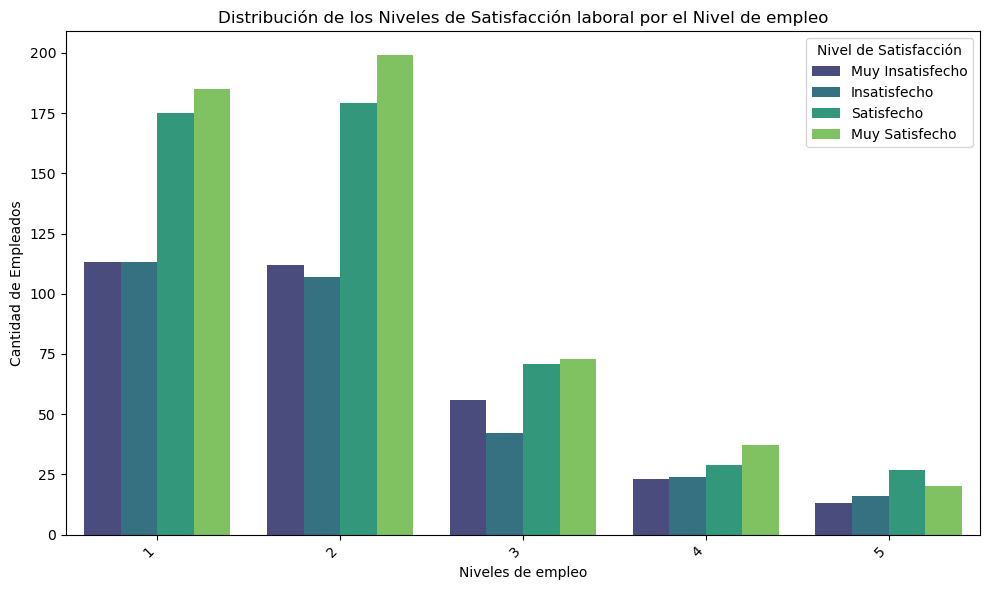

In [33]:
# Crear la columna categórica de satisfacción laboral
bins = 4
labels = ["Muy Insatisfecho", "Insatisfecho", "Satisfecho", "Muy Satisfecho"]
df_analisis["Nivel de Satisfacción"] = pd.cut(df_analisis['jobsatisfaction'], bins=bins, labels=labels, include_lowest=True)

# Crear la tabla de distribución cruzada (departamentos como índice, satisfacción como columnas)
tabla_distribucion = pd.crosstab(
    index=df_analisis['joblevel'],
    columns=df_analisis['Nivel de Satisfacción'],
    values=df_analisis['employee_id'],
    aggfunc='count'
)

# Renombrar el índice a 'Departamento'
tabla_distribucion_reindexada = tabla_distribucion.reset_index().rename(columns={'joblevel': 'Nivel de empleo'})

# Fundir el DataFrame para seaborn
df_melted = tabla_distribucion_reindexada.melt(
    id_vars='Nivel de empleo',
    value_vars=['Muy Insatisfecho', 'Insatisfecho', 'Satisfecho', 'Muy Satisfecho'],
    var_name='Nivel de Satisfacción',
    value_name='Cantidad'
)

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Nivel de empleo',
    y='Cantidad',
    hue='Nivel de Satisfacción',
    data=df_melted,
    palette='viridis'
)

# Personalizar el gráfico
plt.title('Distribución de los Niveles de Satisfacción laboral por el Nivel de empleo')
plt.xlabel('Niveles de empleo')
plt.ylabel('Cantidad de Empleados')
plt.legend(title='Nivel de Satisfacción')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

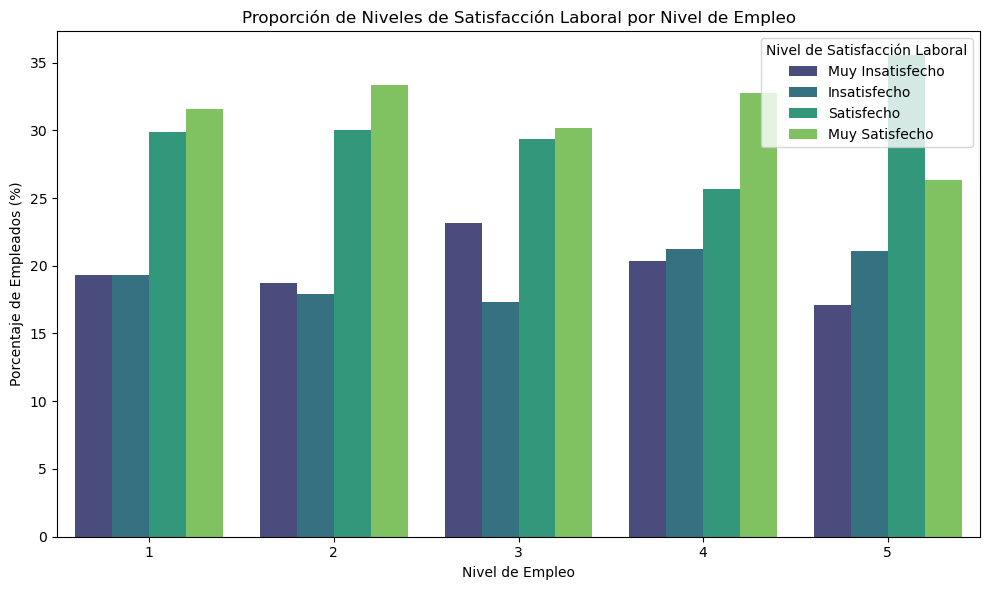

In [ ]:

# Crear la columna categórica de satisfacción laboral
bins = 4
labels = ["Muy Insatisfecho", "Insatisfecho", "Satisfecho", "Muy Satisfecho"]
df_analisis["Nivel de Satisfacción Laboral"] = pd.cut(
    df_analisis['jobsatisfaction'], bins=bins, labels=labels, include_lowest=True
)

# Calcular la proporción de empleados por nivel de empleo y nivel de satisfacción laboral
tabla_proporcion = df_analisis.groupby('joblevel')['Nivel de Satisfacción Laboral'].value_counts(normalize=True).mul(100).rename('Porcentaje').reset_index()

# Crear el gráfico de barras agrupadas de proporciones
plt.figure(figsize=(10, 6))
sns.barplot(
    data=tabla_proporcion,
    x='joblevel',
    y='Porcentaje',
    hue='Nivel de Satisfacción Laboral',
    palette='viridis'
)

# Personalizar el gráfico
plt.title('Proporción de Niveles de Satisfacción Laboral por Nivel de Empleo')
plt.xlabel('Nivel de Empleo')
plt.ylabel('Porcentaje de Empleados (%)')
plt.legend(title='Nivel de Satisfacción Laboral')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Descripción:

- Esta gráfica sugiere que el nivel de empleo puede estar relacionado con la satisfacción laboral. Los empleados en niveles de empleo más bajos podrían necesitar más atención en términos de factores que influyen en su satisfacción laboral. 

Sugerencia:

- Investigar las diferencias en las condiciones de trabajo, las responsabilidades, las oportunidades de crecimiento o la compensación entre los niveles de empleo podría ayudar a identificar áreas de mejora para aumentar la satisfacción laboral, especialmente en los niveles más bajos. Los niveles de empleo más altos parecen tener una mayor proporción de empleados satisfechos y muy satisfechos, lo que podría indicar prácticas o condiciones positivas en esos roles.

11. ¿Cual es la relación del Aumento Salarial con el Nivel de Satisfacción Laboral?

In [34]:
df_analisis[['jobsatisfaction', '%_percentsalaryhike']]

,jobsatisfaction,%_percentsalaryhike
0,3,13
1,3,14
2,4,11
3,3,19
4,1,12
...,...,...
1609,4,11
1610,2,12
1611,3,18
1612,4,13


In [35]:
df_analisis['%_percentsalaryhike'].unique()

array([13, 14, 11, 19, 12, 25, 16, 17, 22, 23, 20, 15, 21, 24, 18],
      dtype=int64)

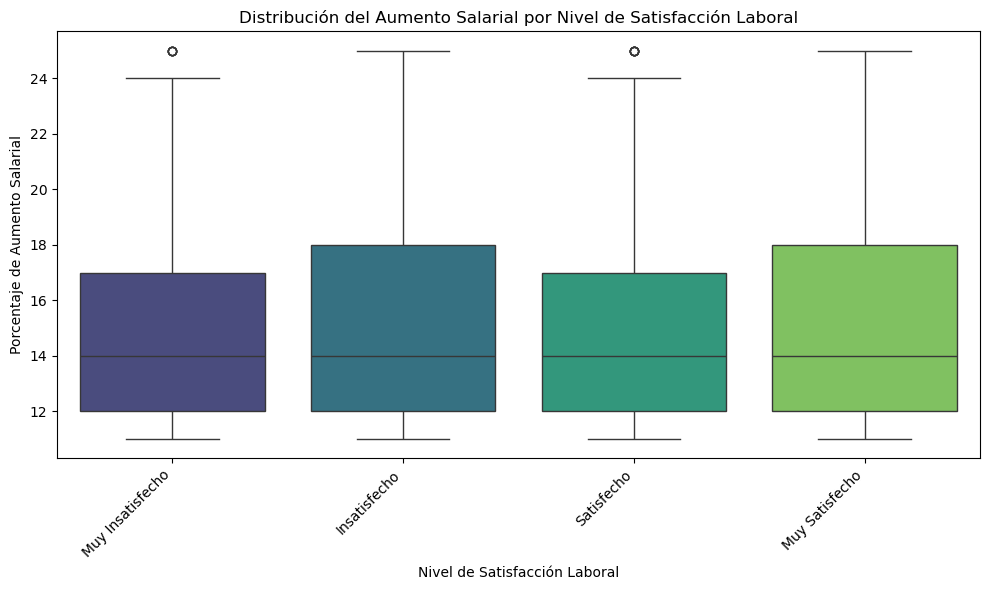

In [36]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='Nivel de Satisfacción',
             y='%_percentsalaryhike', 
             data=df_analisis, 
             palette='viridis')

plt.title('Distribución del Aumento Salarial por Nivel de Satisfacción Laboral')

plt.xlabel('Nivel de Satisfacción Laboral')
plt.ylabel('Porcentaje de Aumento Salarial')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Descripción:

- Este gráfico sugiere que la estrategia de aumentos salariales de la empresa podría no estar directamente ligada a los niveles de satisfacción laboral de los empleados. 

- Si el objetivo fuera utilizar los aumentos salariales como una herramienta para mejorar la satisfacción, este gráfico indicaría que la práctica actual no refleja esa estrategia de manera clara. 

Sugerencia: 

- Investigar qué factores son los principales impulsores de los aumentos salariales y si existe alguna correlación indirecta con la satisfacción laboral a través de otras variables (como el rendimiento).